In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from copy import copy as copy
from pprint import pprint as pprint

In [19]:
raw_data = pd.read_csv("./pre_pro2.csv", index_col=0)
primers_dist = pd.read_csv("./primers_dist.csv", index_col=0)

In [20]:
raw_data.sample(5)

Sample_Name  Offscale  Quality      Size  Height  Area_in_Point  \
3051        D-A5A         1        1  286.3925     456           2554   
17924       L-C2A         1        1  464.2715      56            237   
11650       L-A2B         1        1       NaN     466           3698   
28229       M-C1B         1        1  147.5189      57            120   
11431       L-A2A         1        1       NaN      55            497   

       Area_in_BP  Data_Point  Begin_Point  Begin_BP  End_Point    End_BP  \
3051          221        3989         3981  285.6991       3995  286.9126   
17924          20        5842         5835  463.6525       5847  464.7144   
11650           0         743          736   -1.0000        752   -1.0000   
28229          12        2302         2297  146.9997       2307  148.0373   
11431           0         112          105   -1.0000        124   -1.0000   

       Width_in_Point  Width_in_BP Color_Type  Color_Value  
3051                5       0.4831          B          160  
17924               2       0.1770          R          233  
11650               6       0.0000          B            5  
28229               4       0.5163          R           72  
11431               3       0.0000          Y            1

In [21]:
na_columns = []
_temp = raw_data.isna().sum() > 0
for ii in _temp.index:
    if _temp[ii]:
        na_columns += [ii]

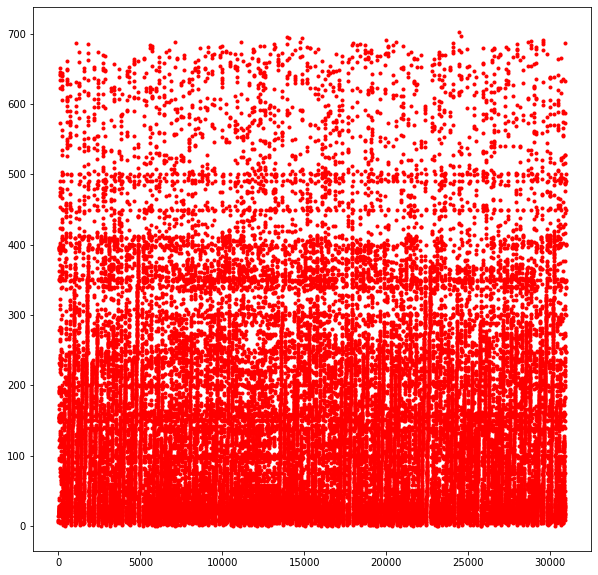

In [25]:
plt.figure(figsize=(10,10))
plt.plot(raw_data[na_columns], '.r')

In [27]:
raw_data[na_columns]
### Assuming is only size

Size
0           NaN
1           NaN
2        5.9963
3        6.7343
4        8.7638
...         ...
30932  400.0000
30933  401.0176
30934  450.0000
30935  490.0000
30936  500.0000

[30937 rows x 1 columns]

In [28]:
current_data = raw_data.Size

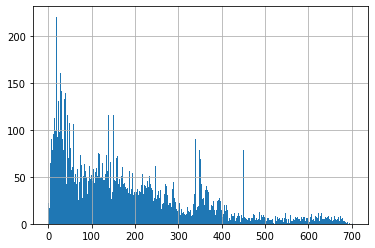

In [32]:
current_data.hist(bins=1000)

In [38]:
current_data = np.matrix([current_data.value_counts().values, current_data.value_counts().index])

In [42]:
current_data = pd.DataFrame(current_data.T, columns=["times", "value"])
current_data.times = current_data.times.astype(np.int)

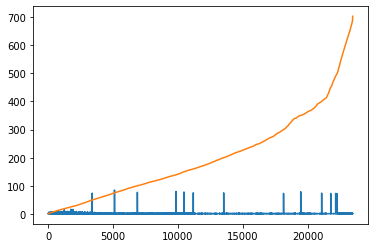

In [45]:
current_data.sort_values(ascending=True,by=["value"], inplace=True)
current_data.index = np.arange(current_data.shape[0])
plt.plot(current_data)

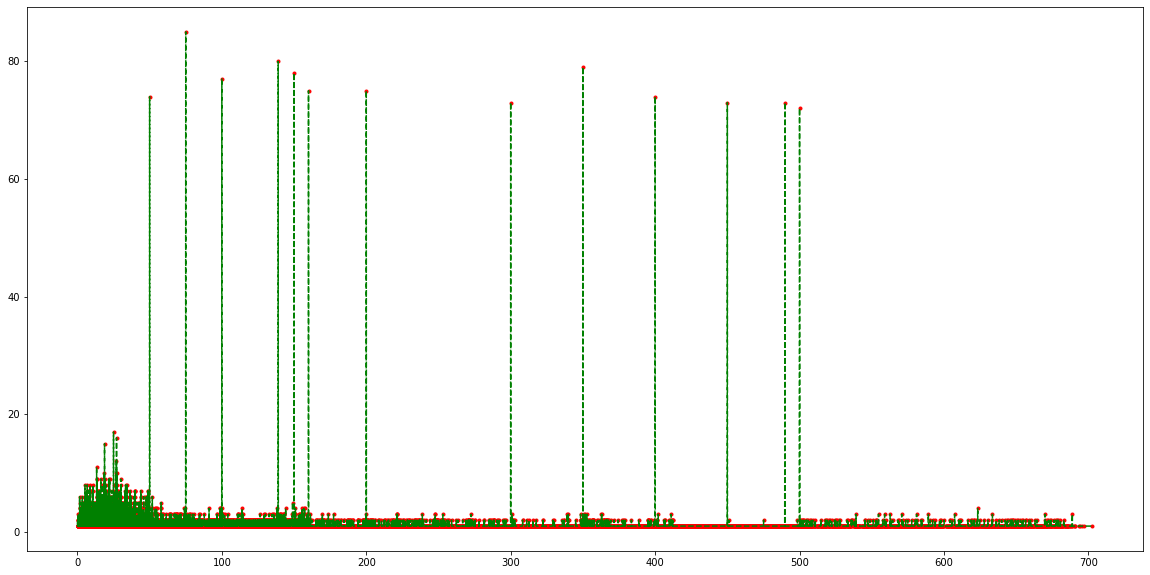

In [53]:
plt.figure(figsize=(20,10))
plt.plot(current_data.value.values, current_data.times.values, '.r')
plt.plot(current_data.value.values, current_data.times.values, '--g')
plt.show()

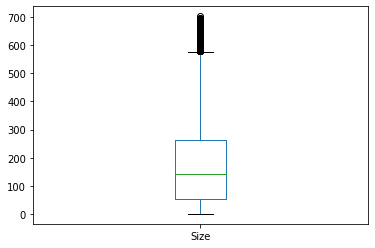

In [57]:
raw_data.Size.plot.box()

In [77]:
x_i = current_data.value.values
x_i_1 = np.zeros((x_i.shape[0] +1))

x_i_1[1:] = x_i

# _temp = np.zeros(x_i_1.shape)
# _temp[:-1] = x_i
# x_i = _temp

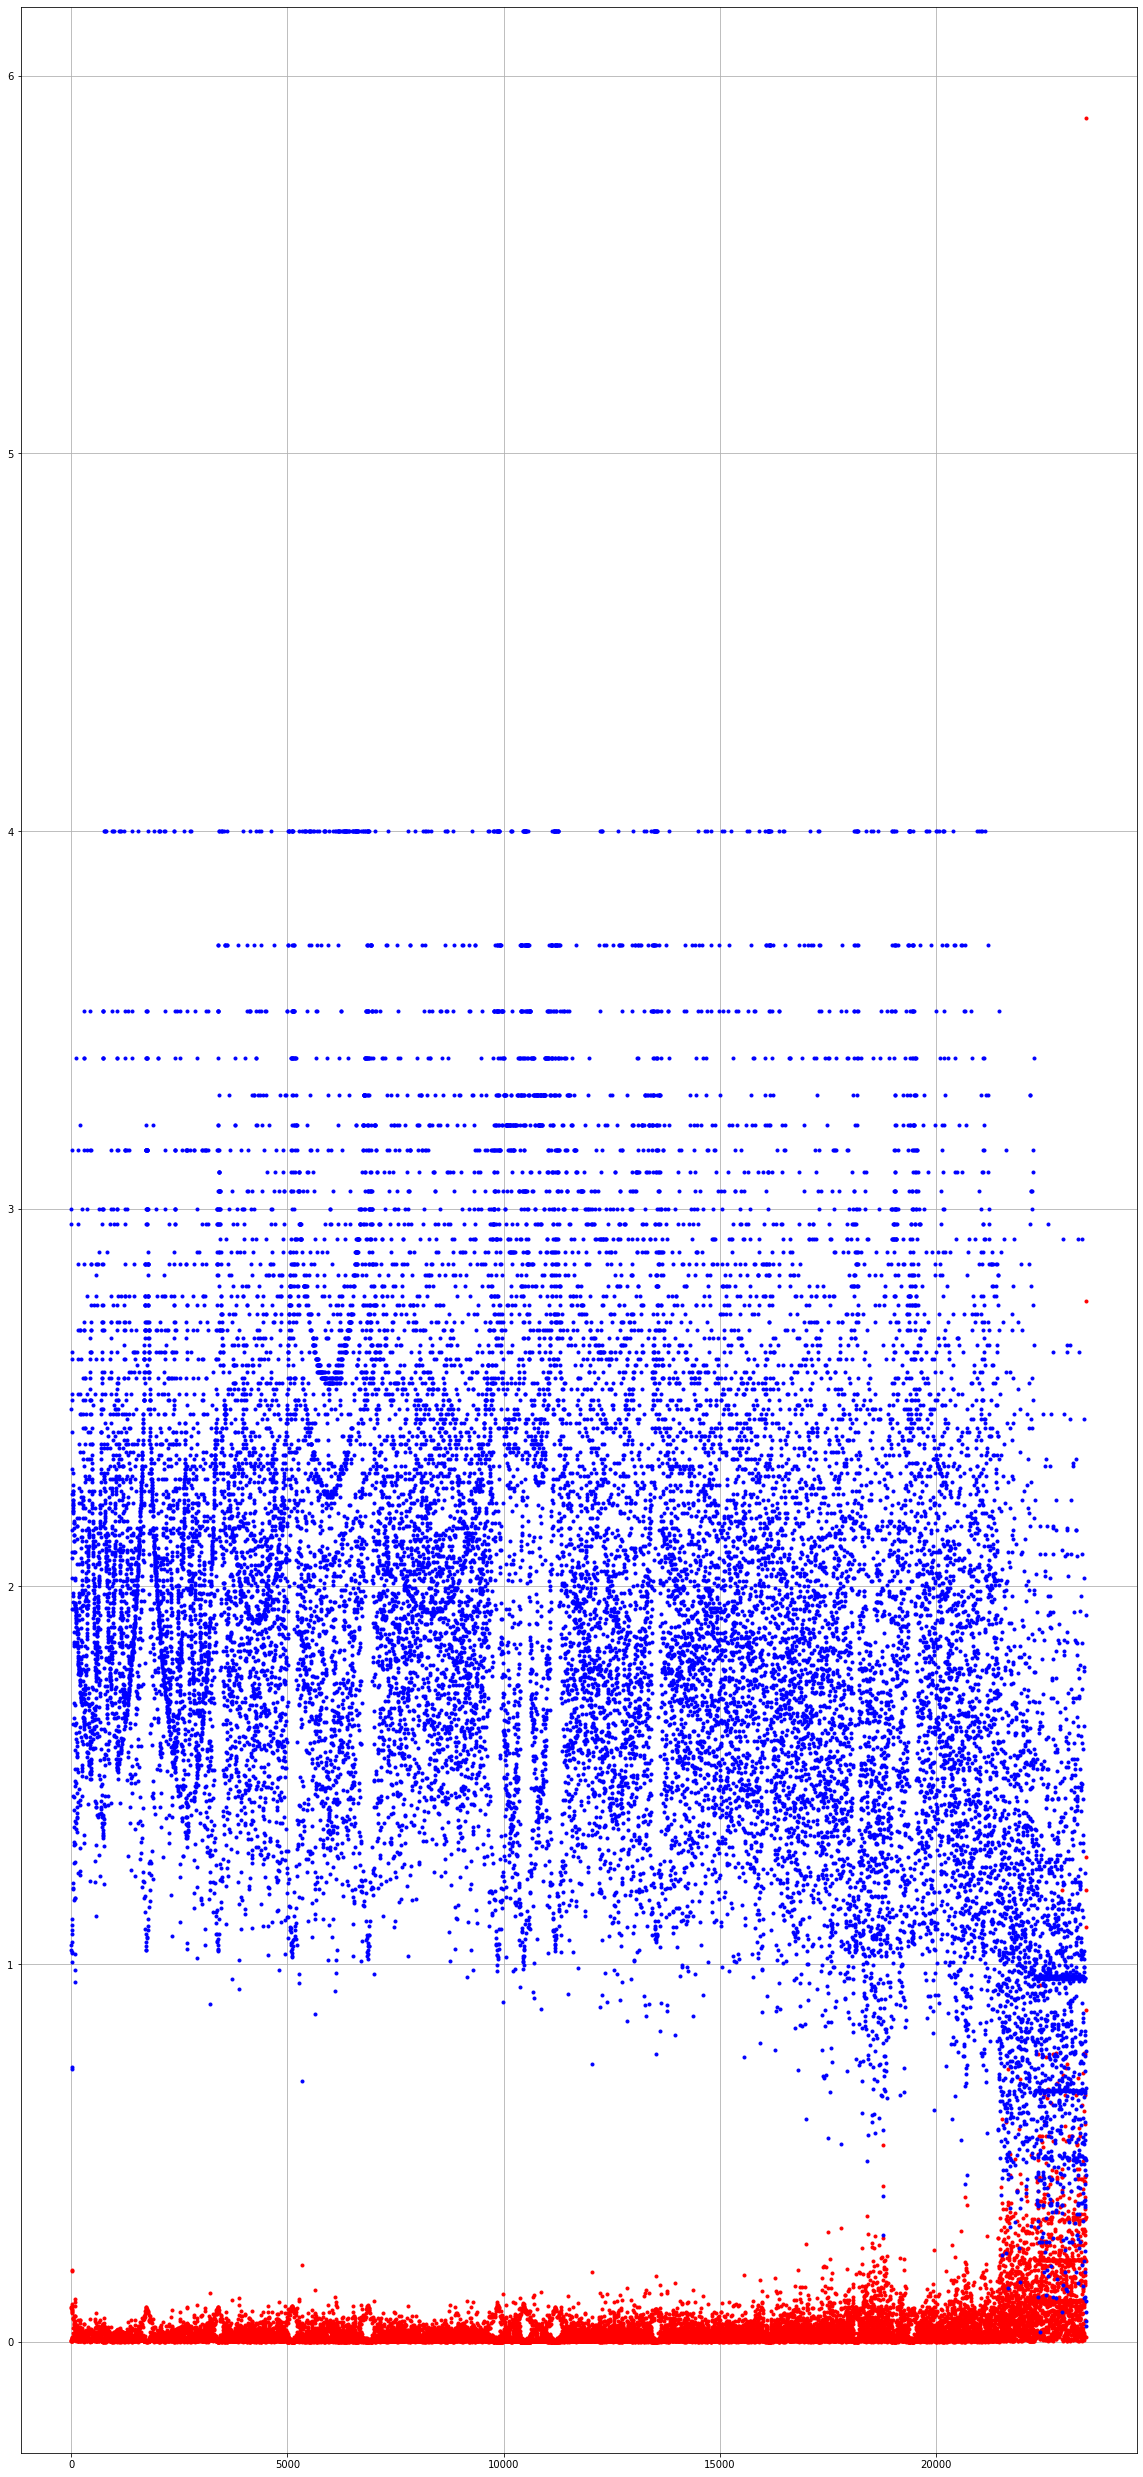

In [85]:
plt.figure(figsize=(20,45))
plt.plot(abs(x_i_1[:-1] - x_i), '.r')
plt.plot(abs(np.log(abs(x_i_1[:-1] - x_i))/np.log(10)), '.b')
plt.grid()
plt.show()